<a href="https://colab.research.google.com/github/adarsh-saji/Deep_learning_projects/blob/main/image_recoginition_using_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img, array_to_img
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
dir_path = '/content/drive/MyDrive/Image_recognition'

In [ ]:
datagen = ImageDataGenerator(
    height_shift_range=0.2,
    rotation_range=40,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2)

train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size= 20
)

for subdirectory in os.listdir(dir_path):
  class_path = os.path.join(dir_path, subdirectory)

  image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path,f))]

  output_dir = os.path.join(dir_path,f'augmented_{subdirectory}')
  os.makedirs(output_dir, exist_ok=True)

  for image_file in image_files:
    img = load_img(os.path.join(class_path,image_file))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)


    i = 0
    for batch in datagen.flow(x,batch_size= 1):
      augmented_image = array_to_img(batch[0])
      image_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}_{i}.jpg")
      image.save_img(image_path, augmented_image)
      i += 1
      if i >= 20:
        break


Found 4 images belonging to 4 classes.


In [ ]:
augmented_dir = '/content/drive/MyDrive/Image_recognition/augmented'

In [ ]:
for subdirectory in os.listdir(augmented_dir):
  class_path = os.path.join(augmented_dir, subdirectory)

  image_files = os.listdir(class_path)

  (train_files),(test_files) = train_test_split(image_files, random_state= 42, test_size=.3)

  train_output_dir = os.path.join(augmented_dir,'train', subdirectory)
  test_output_dir = os.path.join(augmented_dir,'test', subdirectory)
  os.makedirs(train_output_dir, exist_ok= True)
  os.makedirs(test_output_dir, exist_ok= True)

  for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_output_dir, file))

  for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_output_dir, file))

In [ ]:
IMAGE_SIZE = [224,224]
input_layer = Input(shape = IMAGE_SIZE)

In [ ]:
train_path = r'/content/drive/MyDrive/Image_recognition/augmented/train'
test_path = r'/content/drive/MyDrive/Image_recognition/augmented/test'

In [ ]:
vgg = VGG16(input_shape= (224,224,3), weights = 'imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
x = Dense(4, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
training_set = ImageDataGenerator(rescale=(1./255)).flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical'
)
test_set = ImageDataGenerator(rescale=(1./255)).flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical'
)

Found 56 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
    training_set,
    epochs = 5,
    validation_data= test_set,
    validation_steps = (len(test_set)),
    steps_per_epoch = (len(training_set))
)

<ipython-input-21-631a606b09ba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
2/2 [==============================] - 17s 5s/step - loss: 2.3175 - accuracy: 0.2679 - val_loss: 2.5594 - val_accuracy: 0.2500
Epoch 2/5
2/2 [==============================] - 1s 502ms/step - loss: 1.4862 - accuracy: 0.4643 - val_loss: 1.1033 - val_accuracy: 0.5833
Epoch 3/5
2/2 [==============================] - 1s 497ms/step - loss: 0.7557 - accuracy: 0.6607 - val_loss: 1.2659 - val_accuracy: 0.6250
Epoch 4/5
2/2 [==============================] - 1s 576ms/step - loss: 0.4392 - accuracy: 0.8750 - val_loss: 0.9867 - val_accuracy: 0.6250
Epoch 5/5
2/2 [==============================] - 1s 513ms/step - loss: 0.1772 - accuracy: 0.9643 - val_loss: 0.8385 - val_accuracy: 0.7083


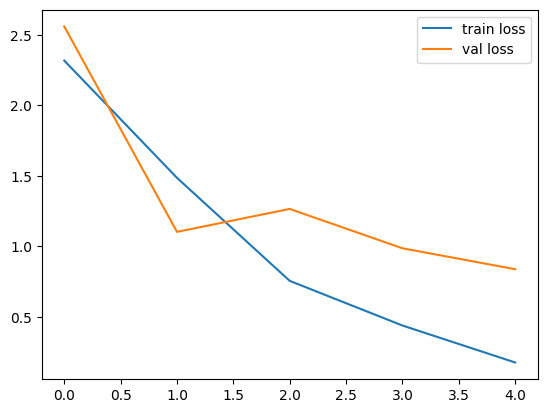

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

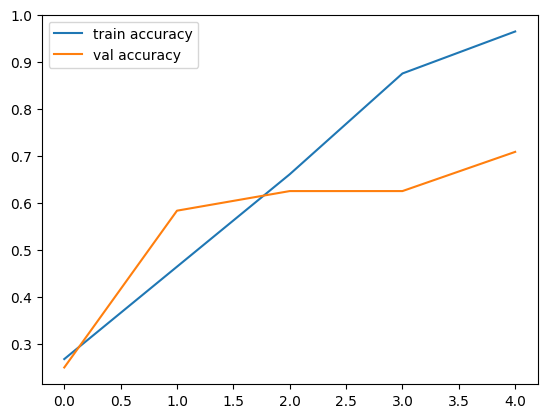

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')